# Exploratory Data Analysis (E.D.A)
 -  This notebook is responsible for eda to analyze structure, distributions, outlier patterns. Identify which outliers are real issues.
 -  Insights from the data, relation among the features.
 -  3 major **objectives** required in project are covered in this notebook:
    - 1. Department wise performances
    - 2. Identifying Non-Performing Employees
    - 3. Top 3 Important Factors effecting employee performance


## 1. Import Libraries

In [276]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## 2. Load the data 

In [457]:
path = 'D:\\DATA_SCIENCE_A.I\\INX Fututre Inc\\data\\raw\\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls'
df = pd.read_excel(path)
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


### Automated E.D.A using Sweetviz

In [12]:
#pip install sweetviz

In [14]:
import sweetviz as sv
eda_report = sv.analyze(df)
eda_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Getting Different Features
 - First we will divide features into-
    * Numerical Features
    * Categorical Features
    * Discrete Features (Numerical feature but less unique values like less than 20)
    * Continuous Features (Numerical feature but more than 20 unique values)

In [25]:
# 1. Numerical Features
num_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Numerical Features:',num_feature)
print('Number of Numerical Features:',len(num_feature))

# 2. Categorical Features
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
print('\nCategorical Features:',cat_feature)
print('Number of Categorical Features:',len(cat_feature))

# 3. Discrete Features
discrete_feature = [feature for feature in num_feature if len(df[feature].unique())<=20]
print('\nDiscrete Features:',discrete_feature)
print('Number of Discrete Features:',len(discrete_feature))

# 4. Continuous Features
conti_feature = [feature for feature in num_feature if len(df[feature].unique())>20]
print('Continuous Features:',conti_feature)
print('Number of Continuous Features:',len(conti_feature))


Numerical Features: ['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']
Number of Numerical Features: 19

Categorical Features: ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']
Number of Categorical Features: 8

Discrete Features: ['EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPro

## 3. 📊 E.D.A and Visualization

## Univariate Analysis

- ###  Distribution of Continuous Numerical Features 

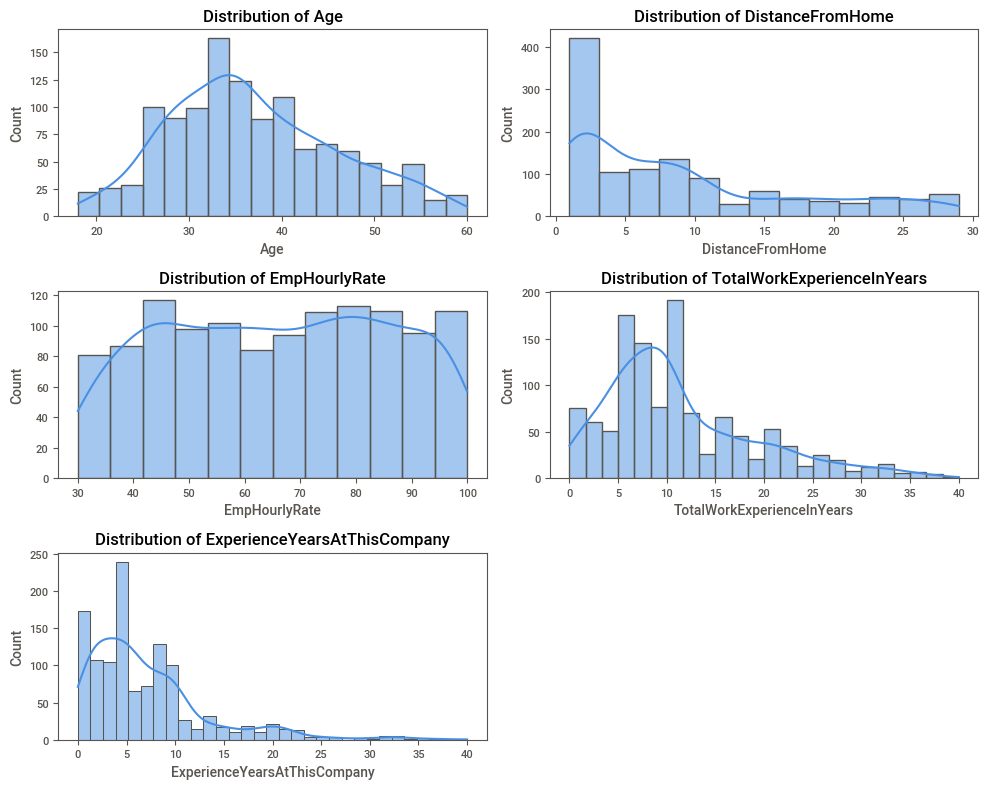

In [84]:
# Continuous Column
plt.figure(figsize=(10,8))
plotnumber=1
for col in conti_feature:
    if plotnumber<6:
        ax = plt.subplot(3,2,plotnumber)
        sns.histplot(x=col, data=df, kde=True, color='#4A90E2', palette='muted')
        plt.title(f'Distribution of {col}')
    plotnumber+=1
plt.tight_layout()

**Insights --**
 - **Age:** Most employees are between 28-40 years, with a peak around 32; distribution is nearly normal.

 - **DistanceFromHome:** Majority live within 5-7 km of work; highly right-skewed distribution.

 - **EmpHourlyRate:** Evenly spread across the hourly rate range; no significant clustering.

 - **TotalWorkExperienceInYears:** Most have 5-12 years of experience; long right tail for higher values (right skewed).

 - **ExperienceYearsAtThisCompany:** Most employees have less than 5 years of experience at the company; strong right skew.

In [ ]:
Blue shades: #4A90E2, #357ABD, #2C5F9E
Green shades: #4CAF50, #3B8E40, #2C6B2E

- ### Distribution of Discrete Numerical Features.

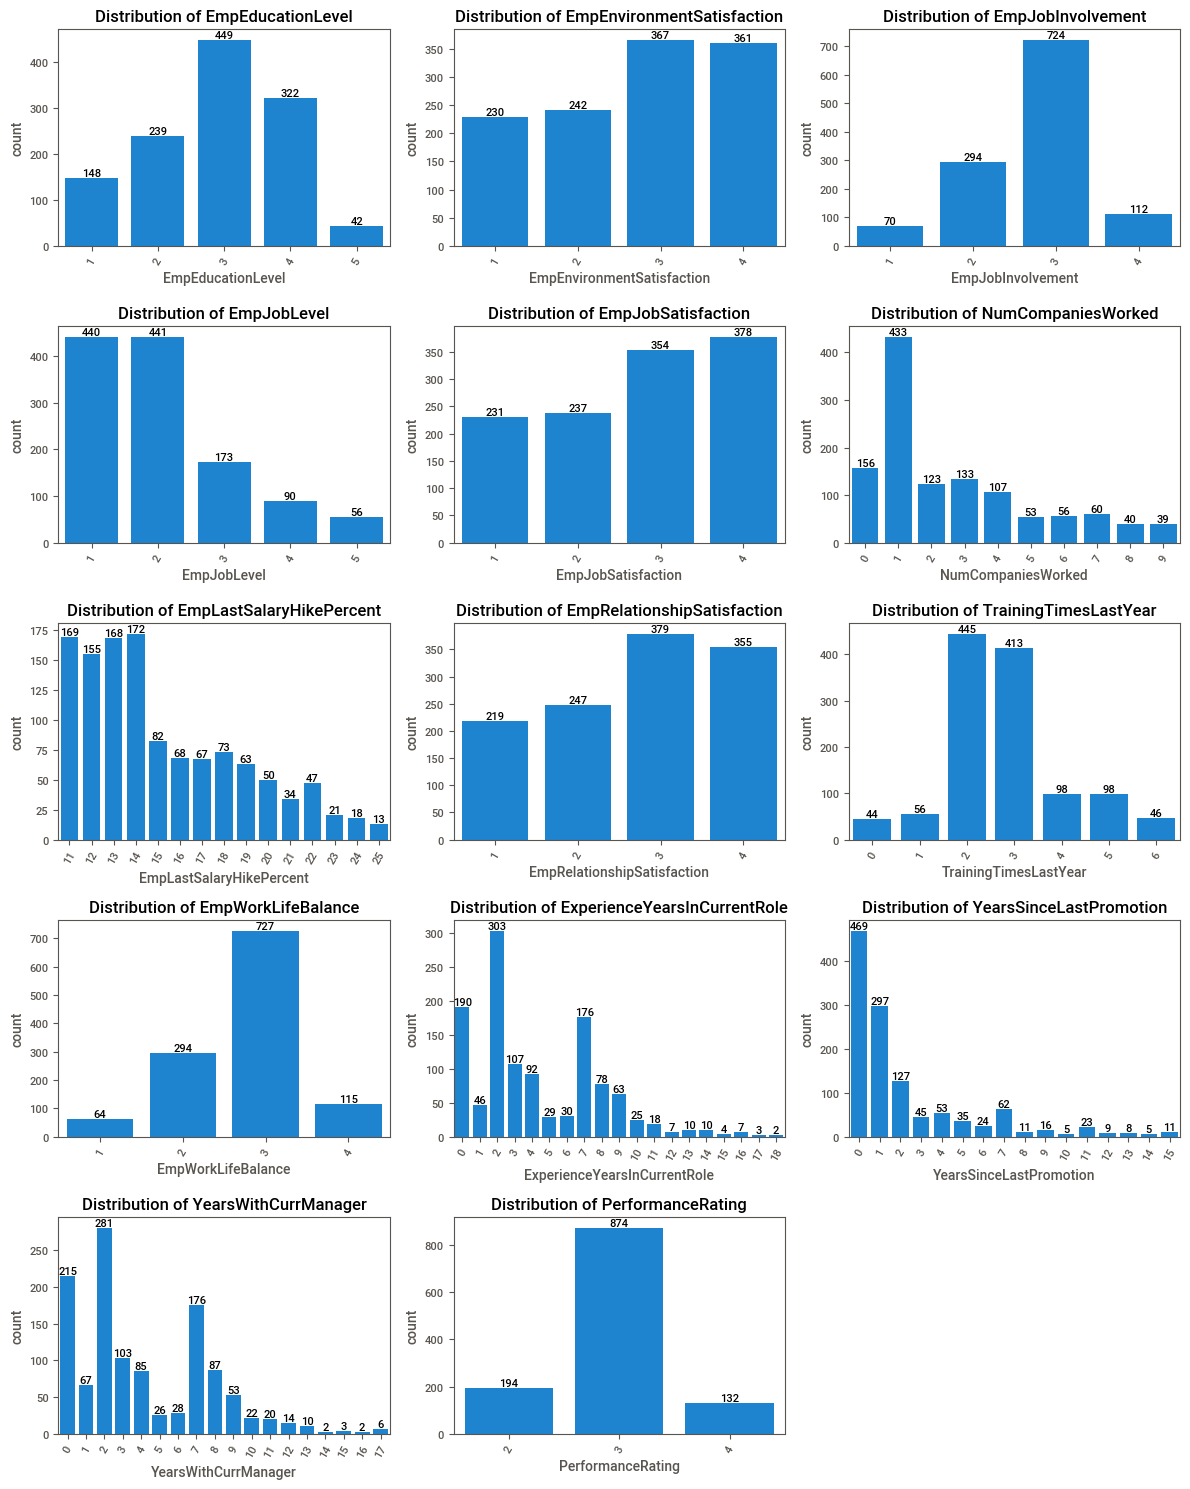

In [110]:
# Discrete Columns
plt.figure(figsize=(12,15))
plotnumber=1

for col in discrete_feature:
    if plotnumber<15:
        ax = plt.subplot(5,3,plotnumber)
        plot = sns.countplot(x=col, data=df)
        plot.bar_label(plot.containers[0], fontsize=8)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=60)
    plotnumber+=1
plt.tight_layout()

**Insights --**
 - **EmpWorkLifeBalance, EmpJobSatisfaction, EmpEnvironmentSatisfaction, EmpRelationshipSatisfaction:** Most employees report high (levels 3 or 4) satisfaction and work-life balance, but a notable minority rate these low.

 - **PerformanceRating:** Majority (874) are rated at level 3, with few at levels 2 (194) and 4 (132); distribution is heavily skewed towards ‘meets expectations’.

 - **Experience/Promotion/Manager Features:** Most employees have spent a few years in current role (≤3 years), with long intervals since last promotion and many recently assigned to current manager; skewed distributions indicate limited upward movement for most.

 - **EmpEducationLevel, EmpJobLevel:** Most employees fall in mid-level education and job levels (levels 2-3), very few at extremes.

 - **EmpJobInvolvement/Training/CompaniesWorked:** Employees are mostly moderately involved and recently trained (levels 2-3), with the majority having worked at 1 or 2 companies.

 - **EmpLastSalaryHikePercent:** Recent hikes mostly concentrated between 11-16%, with few high increments, showing uniform compensation practices. 

- ### Distribution of Categorical Features.

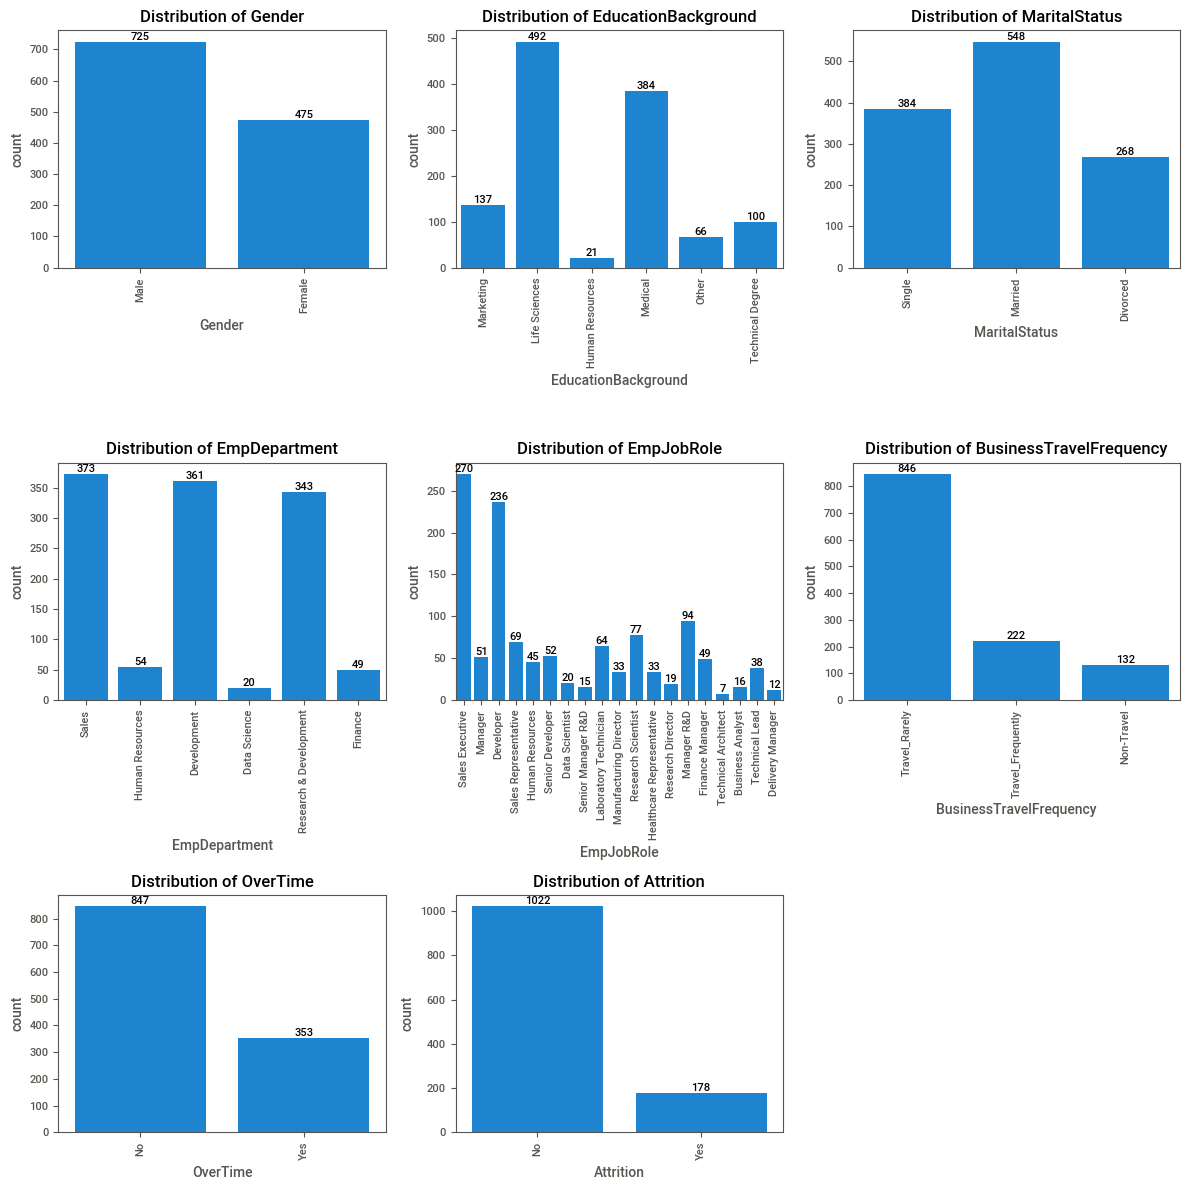

In [133]:
# Categorical Columns
plt.figure(figsize=(12,12))
plotnumber=1

for col in cat_feature:
    if plotnumber<9:
        ax = plt.subplot(3,3,plotnumber)
        plot = sns.countplot(x=col, data=df)
        plot.bar_label(plot.containers[0], fontsize=8)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

**Insights --**
 - **Gender:** Male employees (725) outnumber female employees (475).

 - **EducationBackground:** Life Sciences (492) and Medical (384) are the most common backgrounds; Human Resources is rare.

 - **MaritalStatus:** Majority are married (548), followed by singles (384) and divorced (268).

 - **EmpDepartment:** Sales (373), Development (361), and Research & Development (343) dominate; Data Science and Finance have very few employees.

 - **EmpJobRole:** Sales Executive and Developer are the most common roles; Technical Architect, Business Analyst, and Delivery Manager are rare.

 - **BusinessTravelFrequency:** Most employees travel rarely (846); only 132 report no travel.

 - **OverTime:** Most employees (847) do not work overtime, but a significant number (353) do.

 - **Attrition:** Majority (1022) have not left (No); only 178 attritions (Yes) observed.

## Bivariate Analysis

In [ ]:
## Category columns with Performance Rating

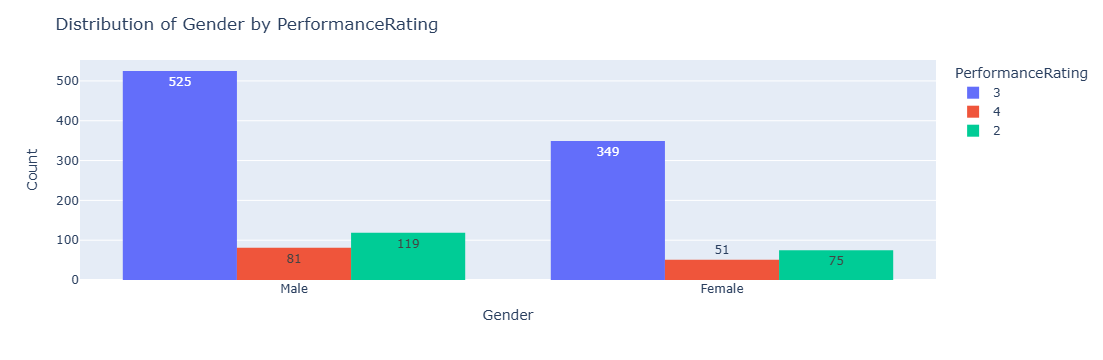

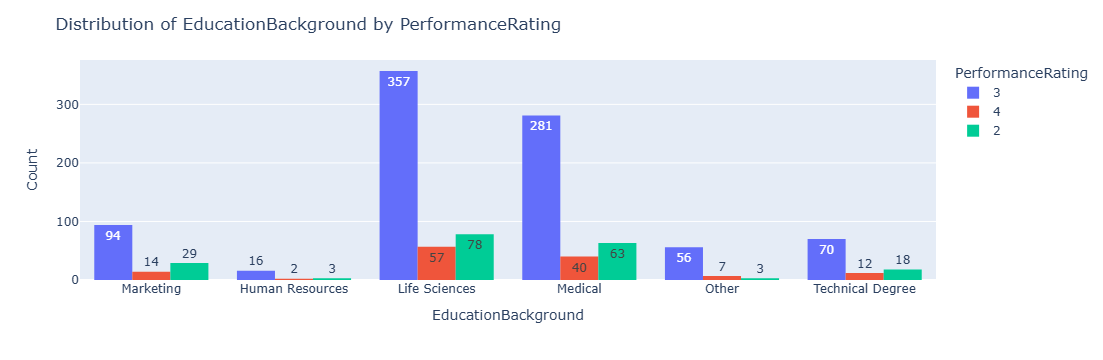

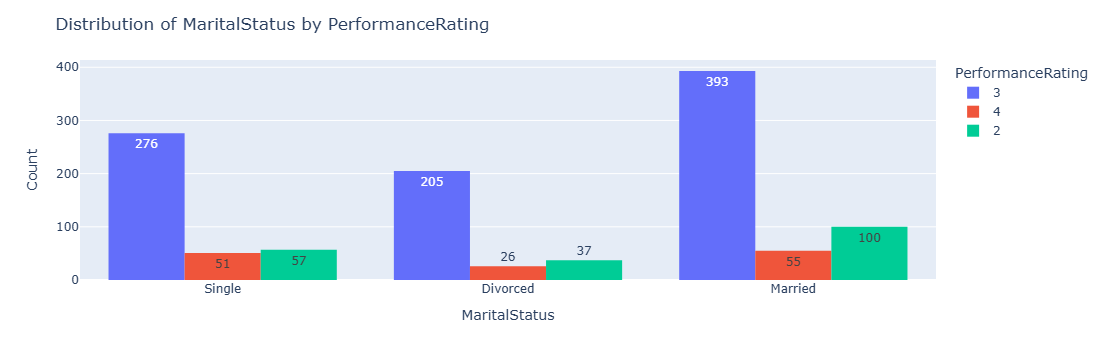

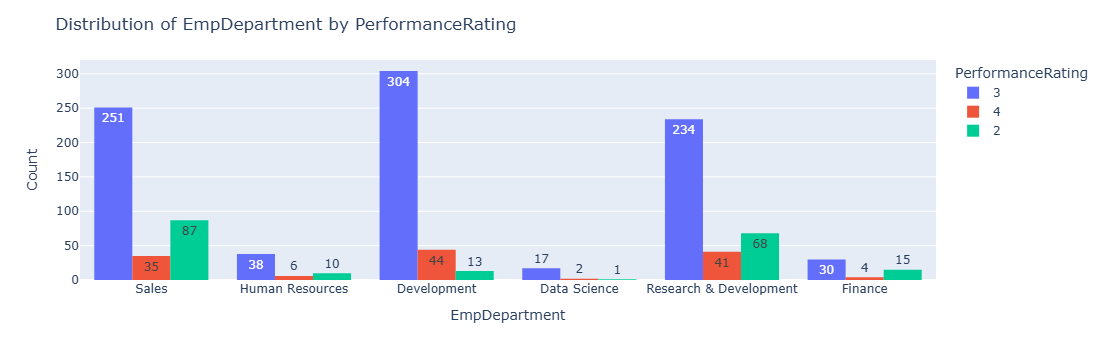

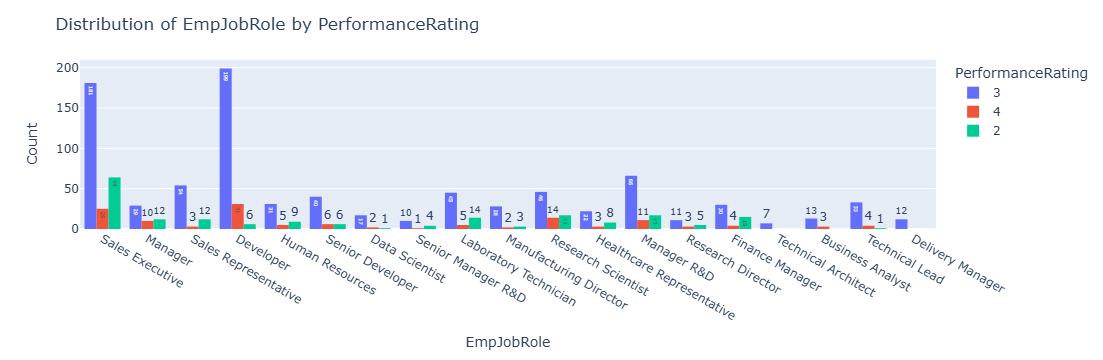

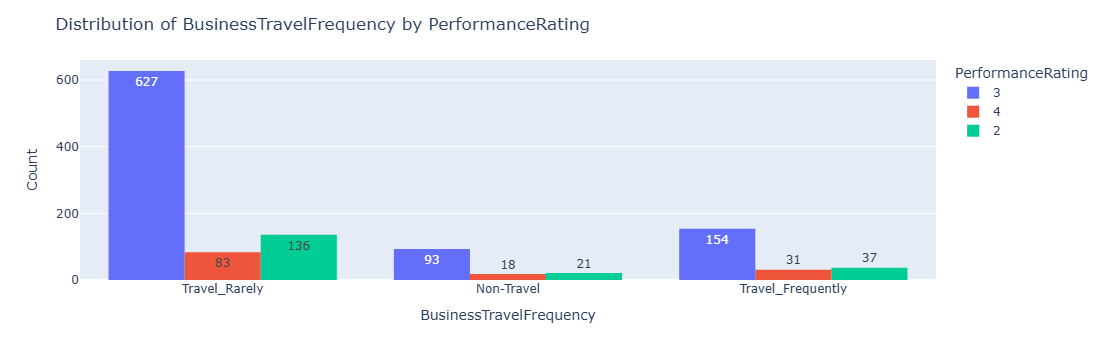

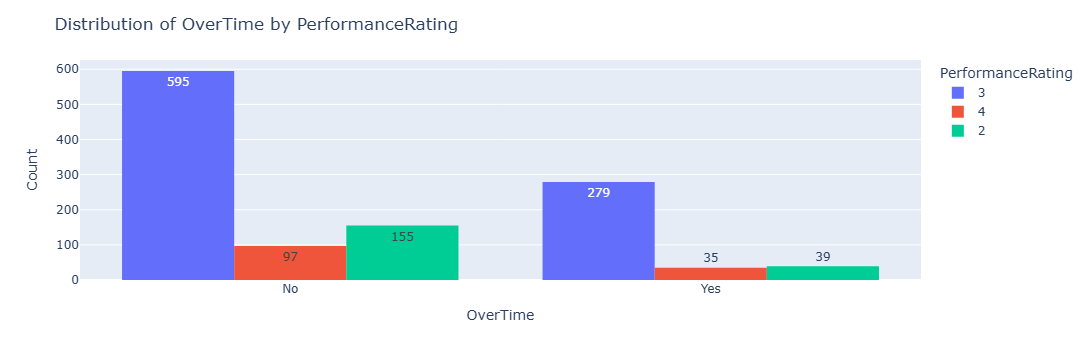

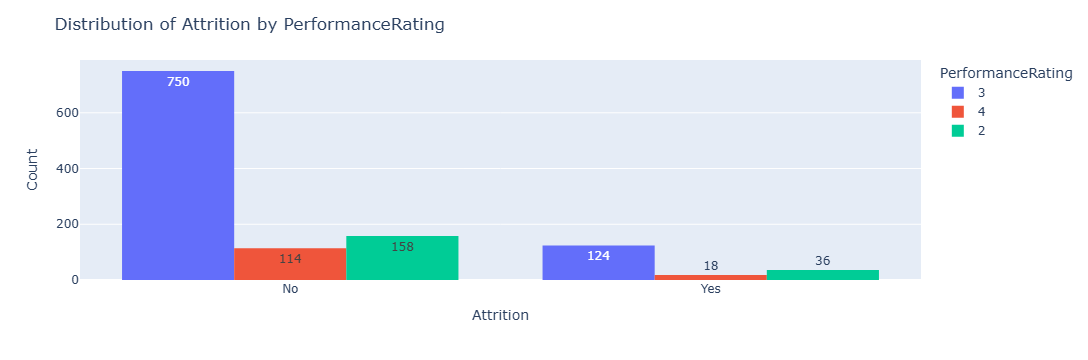

In [284]:
for col in cat_feature:
    fig = px.histogram(df, x=col, color='PerformanceRating', barmode='group', text_auto=True)
    fig.update_layout(
        title=f"Distribution of {col} by PerformanceRating",
        xaxis_title=col, yaxis_title="Count",
        legend_title="PerformanceRating",
        bargap=0.2
    )
    fig.show()

**Insights --**
 - Males outnumber females in every rating category.
 - Attrition is most common among average performers, with the least attrition among high performers.

In [286]:
discrete_feature

['EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

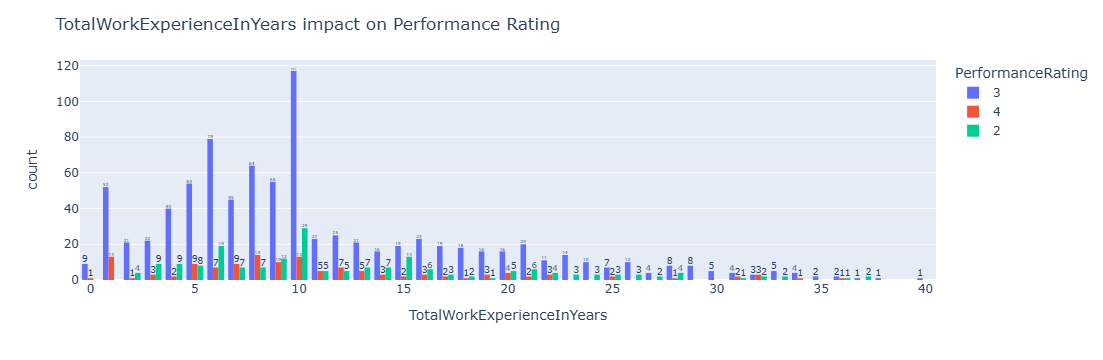

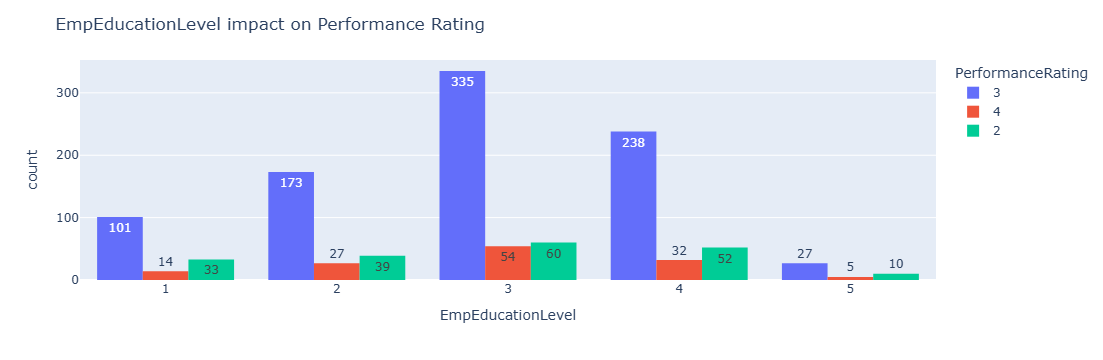

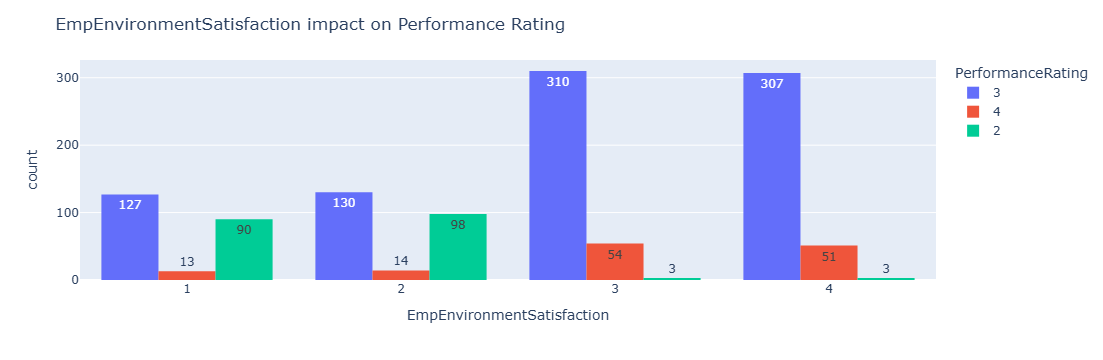

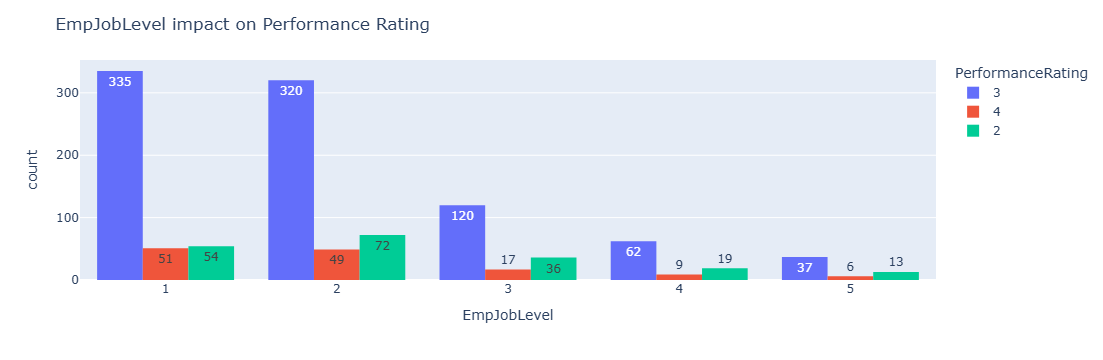

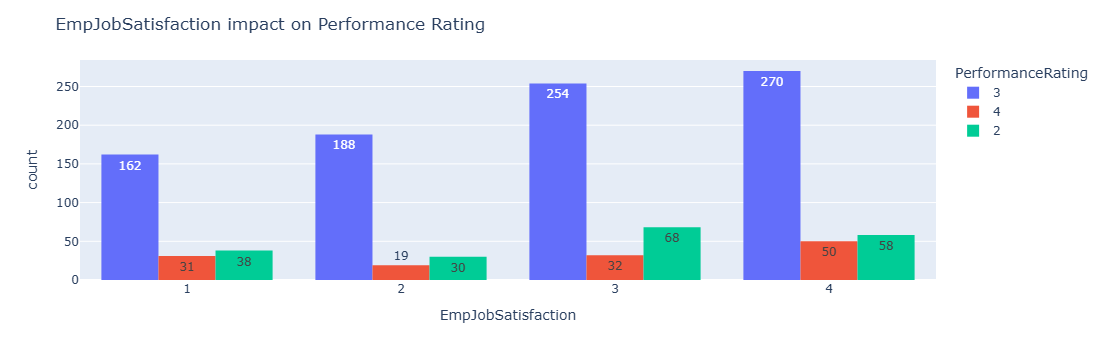

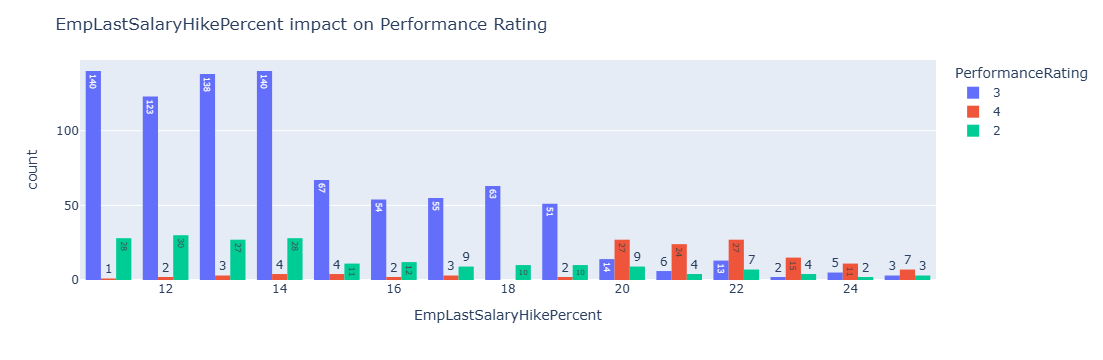

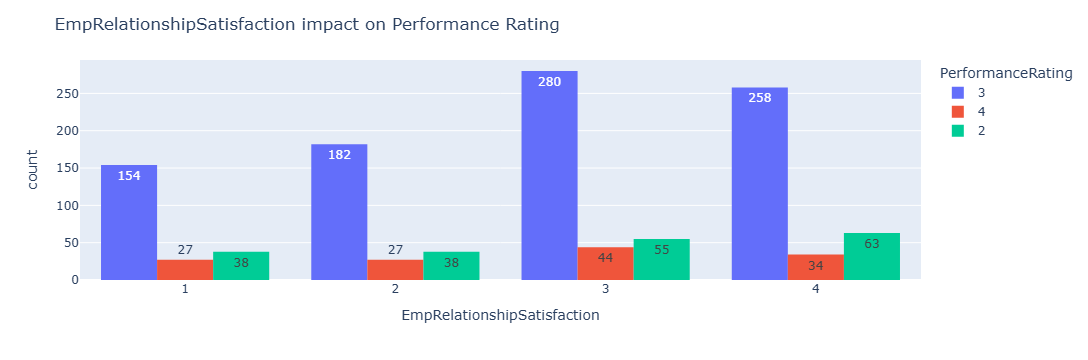

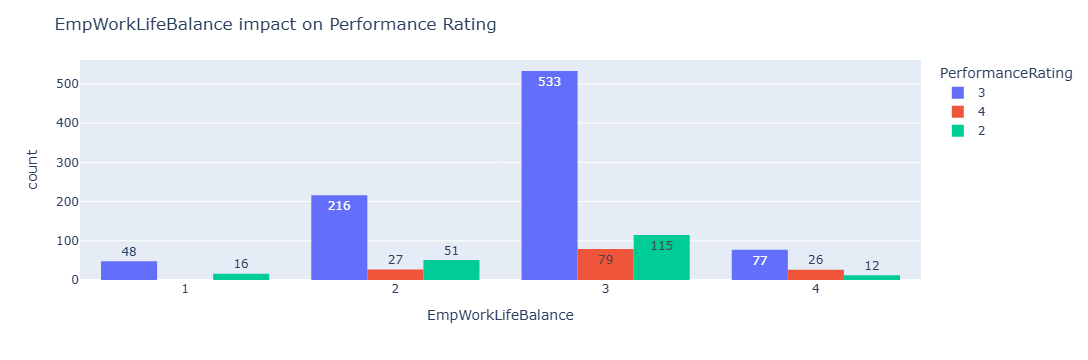

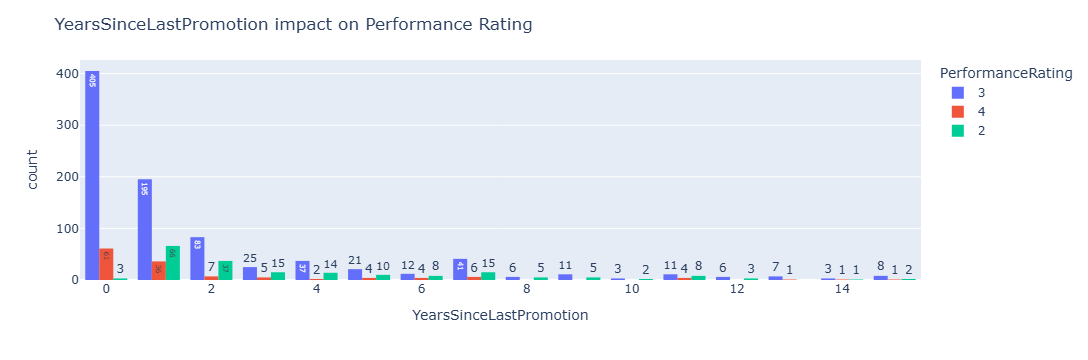

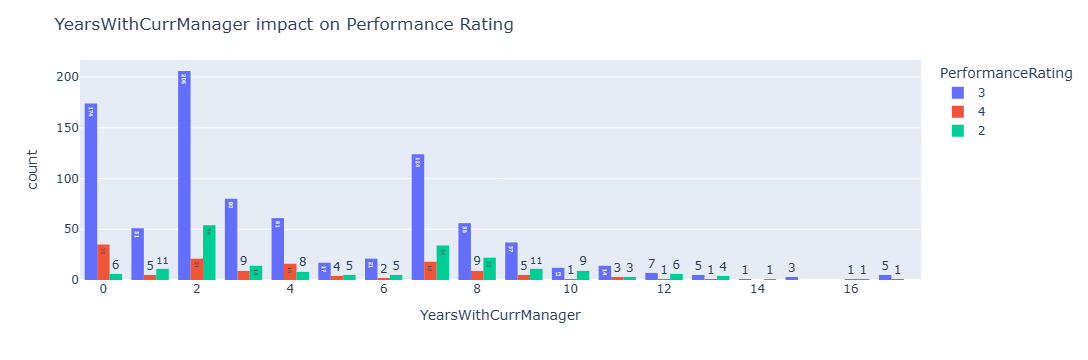

In [316]:
## Important Discrete Columns with Performance Rating

imp_col = ['TotalWorkExperienceInYears','EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobLevel','EmpJobSatisfaction','EmpLastSalaryHikePercent',
          'EmpRelationshipSatisfaction','EmpWorkLifeBalance','YearsSinceLastPromotion','YearsWithCurrManager']

for col in imp_col:
    fig = px.histogram(df,x=col,color='PerformanceRating',barmode='group',text_auto=True)
    fig.update_layout(title=f"{col} impact on Performance Rating",legend_title='PerformanceRating', bargap=0.2)
    fig.show()

**Insights --**
 - When the employee got salary hike of more than 19%, the performce of employee increased. thus, employee performace depends on the salary hike given by the company. employee with higher salary hike percentage has performed well.
 - Higher satisfaction (job, relationship, environment, work-life balance) is slightly associated with fewer low performers ('2'), but most ratings cluster around '3' for all levels.

# Objective 1:
## Department wise performances

In [351]:
# department grouped data
dept = df.groupby(['EmpDepartment','PerformanceRating']).size().unstack(fill_value=0)

In [353]:
dept

PerformanceRating,2,3,4
EmpDepartment,,,
Data Science,1,17,2
Development,13,304,44
Finance,15,30,4
Human Resources,10,38,6
Research & Development,68,234,41
Sales,87,251,35


In [361]:
dept_pct = dept.div(dept.sum(axis=1), axis=0) * 100
dept_pct

PerformanceRating,2,3,4
EmpDepartment,,,
Data Science,5.000000,85.000000,10.000000
Development,3.601108,84.210526,12.188366
Finance,30.612245,61.224490,8.163265
Human Resources,18.518519,70.370370,11.111111
Research & Development,19.825073,68.221574,11.953353
Sales,23.324397,67.292225,9.383378


### a. Key Feature Distribution within Departments

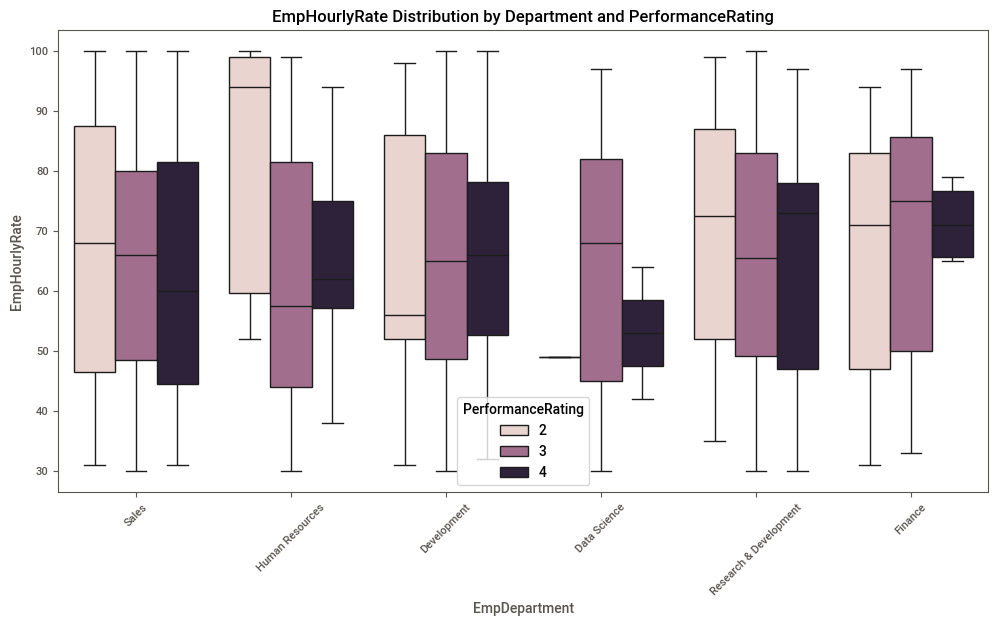

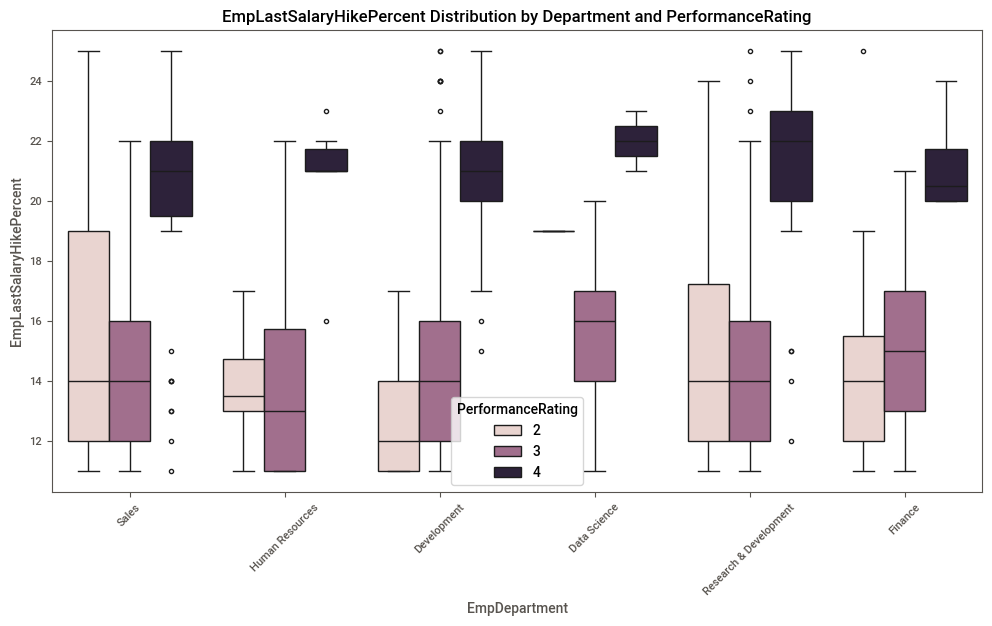

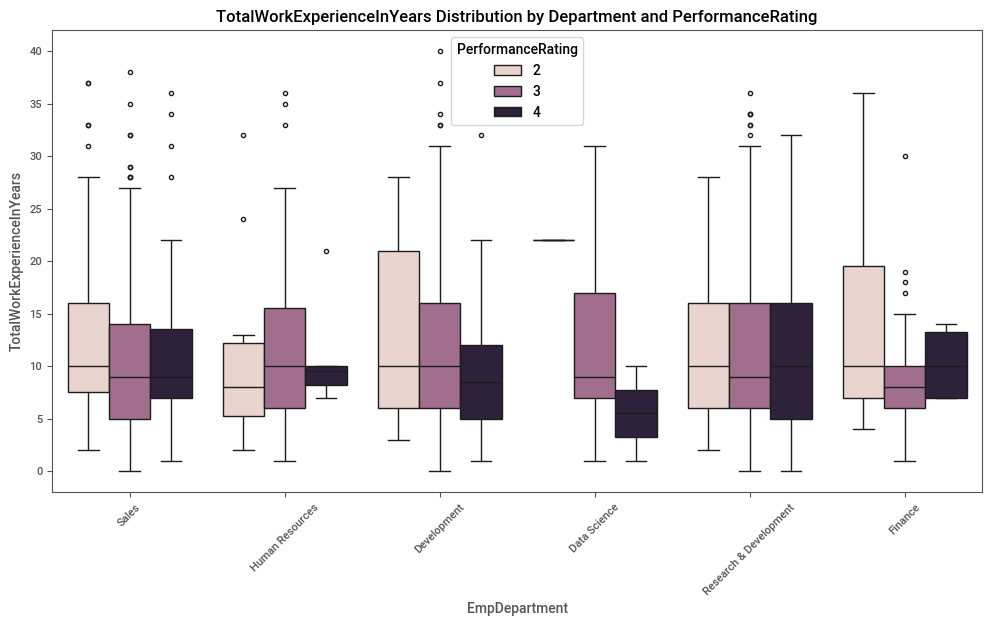

In [371]:
for feature in ['EmpHourlyRate', 'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears']:
    plt.figure(figsize=(12,6))
    sns.boxplot(x='EmpDepartment', y=feature, hue='PerformanceRating', data=df)
    plt.title(f'{feature} Distribution by Department and PerformanceRating')
    plt.xticks(rotation=45)
    plt.show()

**Insights --**
 - **EmpHourlyRate:** Median hourly rates are similar across departments and ratings, but top performers ('4') in Data Science tend to have noticeably lower hourly rates compared to other departments.

 - **EmpLastSalaryHikePercent:** In all departments, employees with rating '4' clearly receive higher average salary hike percentages. The jump is very consistent; rating '3' and '2' receive modest hikes (often 12–16%), but rating '4' is always above 20%.

 - **TotalWorkExperienceInYears:** Higher performance ratings ('4') are associated with lower median experience in several departments (especially Data Science, Development, and Finance). Employees rated '2' or '3' often have higher work experience: suggesting top performers may be relatively newer hires or have less total experience.

 - Across departments, high performers consistently receive greater salary hikes, tend to have less work experience (often), but do not consistently command higher hourly rates.

### b. Attrition Rate by Department

In [375]:
attrition_rate = df.groupby('EmpDepartment')['Attrition'].value_counts(normalize=True).unstack().fillna(0)*100
attrition_rate

Attrition,No,Yes
EmpDepartment,,
Data Science,90.000000,10.000000
Development,85.872576,14.127424
Finance,93.877551,6.122449
Human Resources,85.185185,14.814815
Research & Development,87.172012,12.827988
Sales,81.233244,18.766756


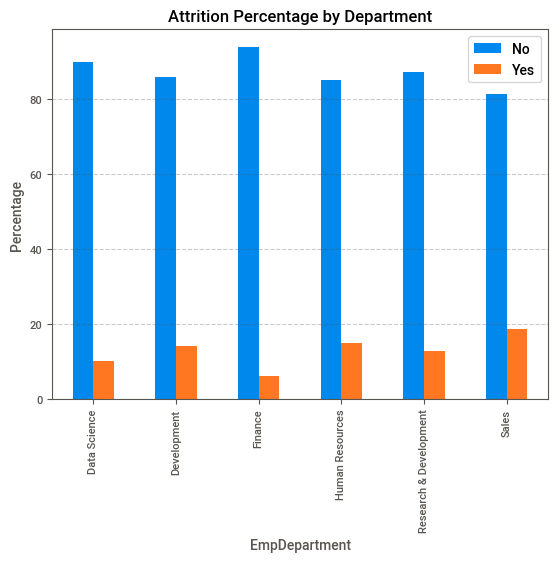

In [411]:
attrition_rate.plot(kind='bar', stacked=False)
plt.title('Attrition Percentage by Department')
plt.ylabel('Percentage')
plt.legend(loc='best')
plt.grid(True, axis='y', alpha=0.3, linestyle='--')

**Insights --**
 - Sales department stands out with the highest attrition rate at 18.8%, indicating employee retention is noticeably worse compared to other departments.

 - Finance has the lowest attrition rate (6.1%), suggesting best retention.

 - Data Science, Development, R&D, Human Resources have moderate attrition, mostly between 10–15%.

 - The majority of employees stay in all departments, but Sales, followed by HR and Development, likely need targeted retention strategies.

### c. Job Role within Department by Rating

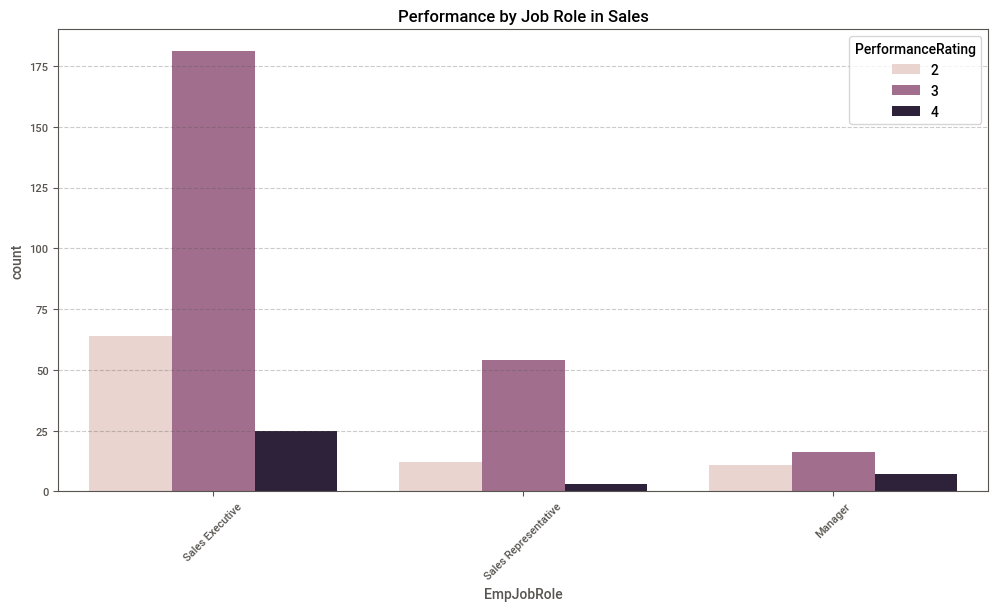

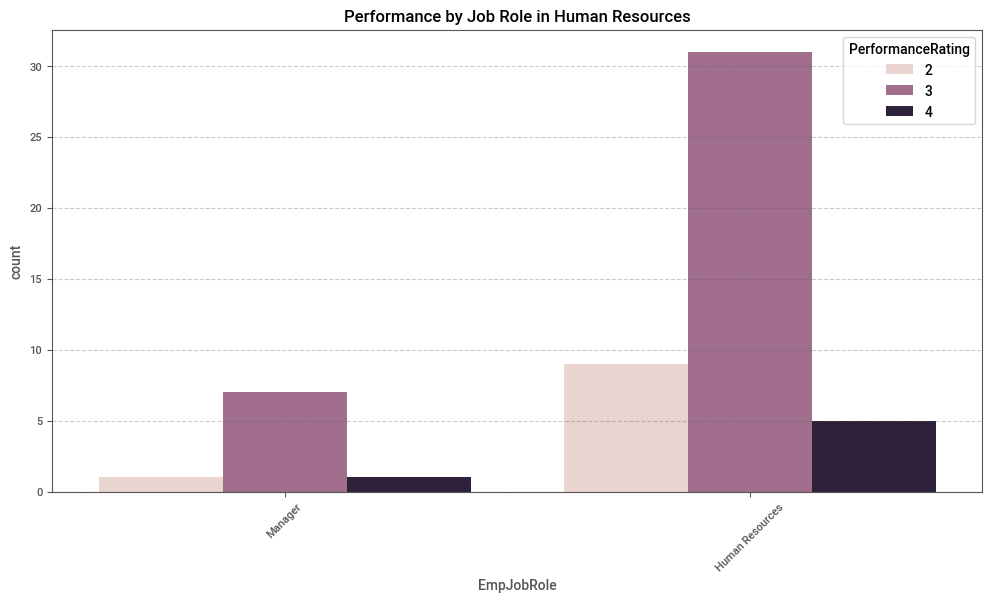

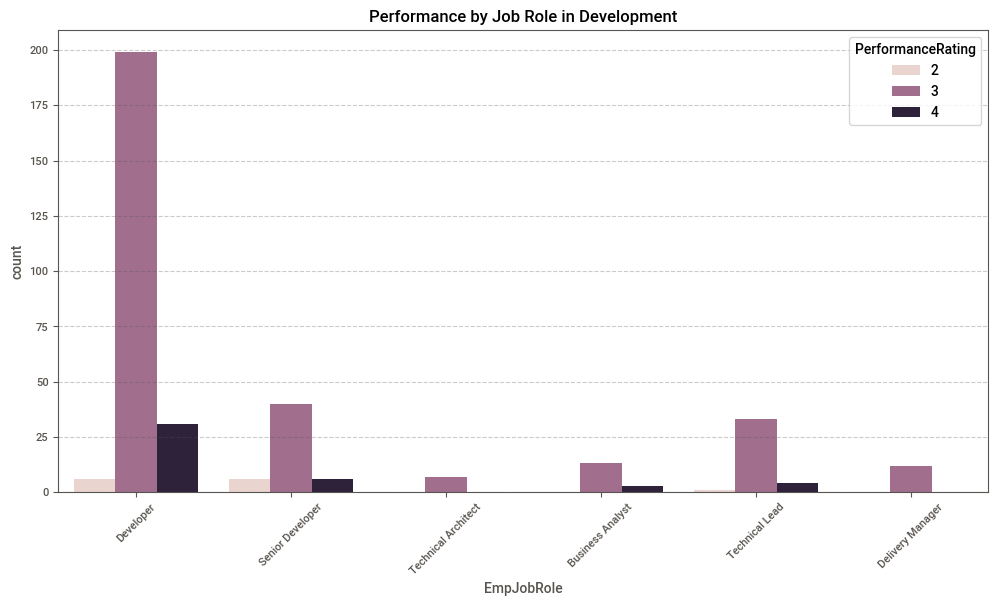

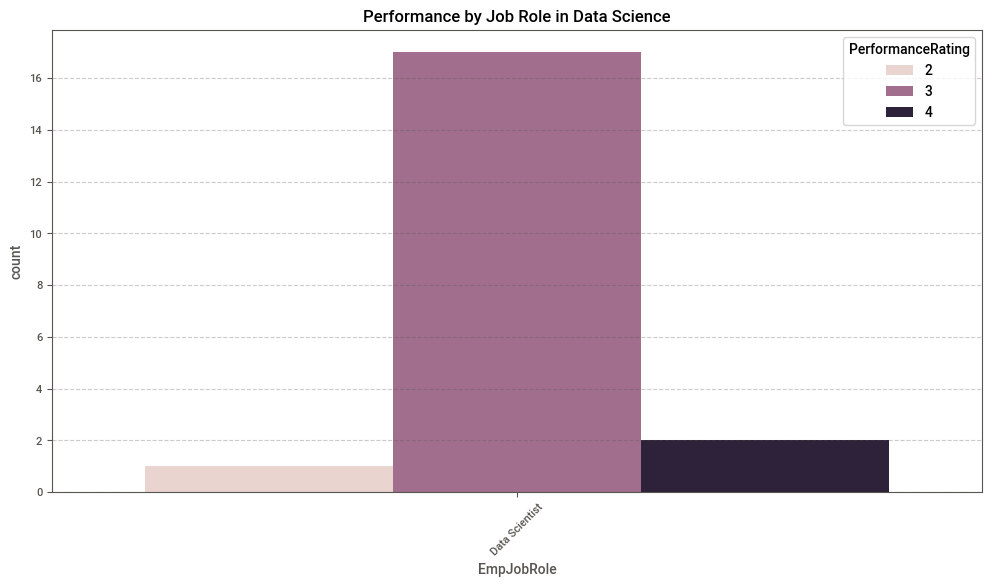

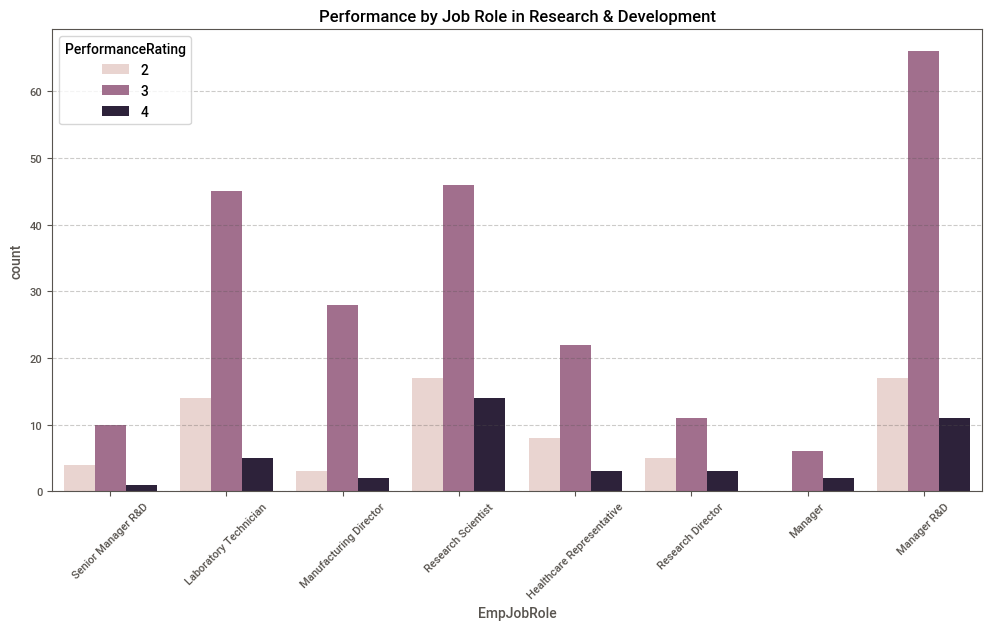

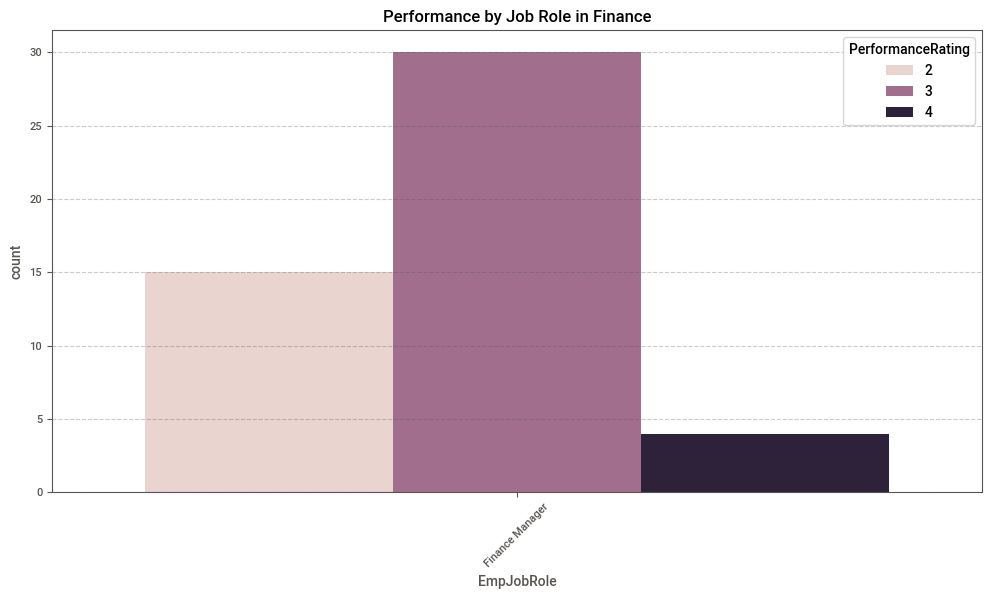

In [414]:
for dept in df['EmpDepartment'].unique():
    plt.figure(figsize=(12,6))
    sns.countplot(x='EmpJobRole', hue='PerformanceRating', data=df[df['EmpDepartment']==dept])
    plt.title(f'Performance by Job Role in {dept}')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.3)

### d. Department Wise Numeric Feature Means

In [419]:
numeric_cols = ['EmpHourlyRate', 'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance']
dept_stats = df.groupby(['EmpDepartment','PerformanceRating'])[numeric_cols].mean().unstack().round(2)
dept_stats

EmpHourlyRate               EmpLastSalaryHikePercent  \
PerformanceRating                  2      3      4                        2   
EmpDepartment                                                                 
Data Science                   49.00  64.12  53.00                    19.00   
Development                    64.85  65.85  65.98                    12.69   
Finance                        63.47  67.67  71.50                    14.53   
Human Resources                81.10  61.74  65.17                    13.90   
Research & Development         69.87  66.40  65.88                    14.99   
Sales                          66.99  65.03  63.26                    15.68   

                                     EmpWorkLifeBalance              
PerformanceRating           3      4                  2     3     4  
EmpDepartment                                                        
Data Science            15.65  22.00               3.00  2.41  3.00  
Development             14.50  20.84               2.77  2.66  2.84  
Finance                 15.00  21.25               2.53  2.70  3.00  
Human Resources         14.03  20.67               2.70  2.95  3.17  
Research & Development  14.37  21.15               2.56  2.74  3.07  
Sales                   14.31  19.89               2.68  2.80  3.06

**Insight --**
 - Across all departments, higher performance is most consistently rewarded by higher salary hikes and better work-life balance, while hourly rate varies more by department and less by individual rating.

In [423]:
conti_feature

['Age',
 'DistanceFromHome',
 'EmpHourlyRate',
 'TotalWorkExperienceInYears',
 'ExperienceYearsAtThisCompany']

### e. Correlation within Departments

In [440]:
# Department-specific correlation matrix for numeric features
for dept in df['EmpDepartment'].unique():
    corr = df[df['EmpDepartment']==dept][numeric_cols].corr()
    print(f"\nCorrelation in {dept}:\n {corr}")



Correlation in Sales:
                           EmpHourlyRate  EmpLastSalaryHikePercent  \
EmpHourlyRate                  1.000000                 -0.025722   
EmpLastSalaryHikePercent      -0.025722                  1.000000   
EmpWorkLifeBalance             0.045049                 -0.051525   

                          EmpWorkLifeBalance  
EmpHourlyRate                       0.045049  
EmpLastSalaryHikePercent           -0.051525  
EmpWorkLifeBalance                  1.000000  

Correlation in Human Resources:
                           EmpHourlyRate  EmpLastSalaryHikePercent  \
EmpHourlyRate                  1.000000                 -0.006321   
EmpLastSalaryHikePercent      -0.006321                  1.000000   
EmpWorkLifeBalance            -0.078765                 -0.184218   

                          EmpWorkLifeBalance  
EmpHourlyRate                      -0.078765  
EmpLastSalaryHikePercent           -0.184218  
EmpWorkLifeBalance                  1.000000  

Correlation

**Insight --**
 - For any department, higher salary, better work-life balance, or a larger salary hike generally do not occur together or drive each other in a linear manner.
 - The only slight exception is Finance, where EmpWorkLifeBalance and EmpLastSalaryHikePercent show a mild positive correlation (0.22), suggesting employees there who get higher raises may also report better work-life balance.

# Objective 2:
## Identifying Non-Performing Employees 

#### * Major Features for Identifying Non-Performers --
 - According to **Mr.Brain's** expectation to clearly identify non-performing employees in a way that supports fair decision-making and preserves morale the selection focuses on **objective, consistently measurable features** with clear separation for low performers across departments.
 The following features have been used for this purpose:

   - **PerformanceRating:** Use as the primary label (employees with rating=2 are flagged for review).

   - **EmpLastSalaryHikePercent:** Non-performers consistently receive the lowest salary hikes across all departments. Low hike percent (<15%) is a strong indicator.

   - **EmpJobSatisfaction, EmpWorkLifeBalance, EmpJobInvolvement:** Low scores (levels 1 or 2) often cluster with underperformance.

   - **EmpWorkLifeBalance:** Very low scores (1 or 2) can help distinguish persistent non-performers.

   - **YearsSinceLastPromotion:** Long periods without promotion, when combined with low ratings and other negatives.

   - **Recent Attrition in Team/Department:** Useful for context, but should be used carefully—not to penalize those just in high-attrition departments. 

In [504]:
non_perf_emp = df.loc[(df['PerformanceRating']==2) & (df['EmpLastSalaryHikePercent']<15) & (df['YearsSinceLastPromotion']>3) &
       (df['Attrition']=='No')& ((df['EmpJobSatisfaction']<=2) | (df['EmpWorkLifeBalance']<=2) | (df['EmpJobInvolvement']<=2))
      ,['EmpNumber','EmpLastSalaryHikePercent','YearsSinceLastPromotion','EmpJobSatisfaction','EmpJobInvolvement',
        'EmpWorkLifeBalance','Attrition','PerformanceRating']]
non_perf_emp

,EmpNumber,EmpLastSalaryHikePercent,YearsSinceLastPromotion,EmpJobSatisfaction,EmpJobInvolvement,EmpWorkLifeBalance,Attrition,PerformanceRating
222,E1001395,13,4,3,2,3,No,2
291,E1001522,14,6,1,3,2,No,2
425,E1001763,14,6,1,3,2,No,2
457,E1001826,12,7,1,3,4,No,2
462,E1001831,12,7,2,3,3,No,2
511,E1001918,11,7,2,3,1,No,2
547,E1001974,14,4,4,2,4,No,2
550,E1001979,12,8,4,2,3,No,2
571,E1002018,14,12,2,3,2,No,2
599,E1002062,14,5,4,2,3,No,2


In [506]:
len(non_perf_emp)

20

#### Statement -:
 - Based on the criteria, **20 employees** have been objectively **identified** as **persistent non-performers**. This group shows sustained low performance ratings, minimal salary growth, poor recent career progression, and low satisfaction or involvement scores, making them suitable candidates for targeted review and development, while minimizing negative impact on overall employee morale.
 - Mr. Brain can review them and choose right course of action like penalizing or giving them final warning for their performance.

In [511]:
# save the non performing employees data.
path = 'D:\\DATA_SCIENCE_A.I\\INX Fututre Inc\\data\\processed\\Non_Performing_Employees_data.csv'
df.to_csv(path, index=False)

# Objective 3:
## Top 3 Important Factors Affecting Employee Performance

To drive strategic improvement in our workforce, it is crucial to understand which measurable factors have the greatest impact on employee performance. Our comprehensive data analysis has identified the following three factors as the most significant drivers influencing overall and department-level outcomes:

**Top 3 Important Factors Affecting Employee Performance:**

1. **EmpLastSalaryHikePercent:**
Employees who consistently receive higher salary hikes are also rated as stronger performers, making salary growth a clear indicator of both recognition and motivation.

2. **EmpJobSatisfaction & EmpWorkLifeBalance:**
High job satisfaction and strong work-life balance scores are strongly correlated with elevated performance ratings, while low scores in these areas are a strong indicator of underperformance and disengagement.

3. **YearsSinceLastPromotion:**
A longer period without promotion is a key marker of persistent underperformance, with career stagnation frequently aligning with lower annual reviews across teams.

Focusing on these key metrics will enable leadership to align rewards, engagement strategies, and targeted development with the true drivers of performance, ensuring both fairness and maximum organizational impact.
   